## Hands On Session on K-Means algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Cricket.csv", encoding='latin')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16


In [3]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [4]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
df['Span'].str.split('-', expand=True)

,0,1
0,1989,2012
1,2000,2015
2,1995,2012
3,1989,2011
4,1998,2015
5,1991,2007
6,1996,2014
7,1992,2007
8,1996,2011
9,1990,2007


In [8]:
df[['start', 'end']] = df['Span'].str.split('-', expand=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
start     79 non-null object
end       79 non-null object
dtypes: float64(2), int64(8), object(5)
memory usage: 9.3+ KB


In [10]:
df['start'] = df['start'].astype(int)
df['end'] = df['end'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
start     79 non-null int32
end       79 non-null int32
dtypes: float64(2), int32(2), int64(8), object(3)
memory usage: 8.7+ KB


In [12]:
df['Exp'] = df['end'] - df['start']

In [13]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [14]:
df.drop(['Span', 'end', 'start'], axis=1, inplace=True)

In [15]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [16]:
df['HS'] = df['HS'].str.replace('*','')

In [17]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
Exp       79 non-null int32
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [19]:
df['HS'] = df['HS'].astype(int)

In [20]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


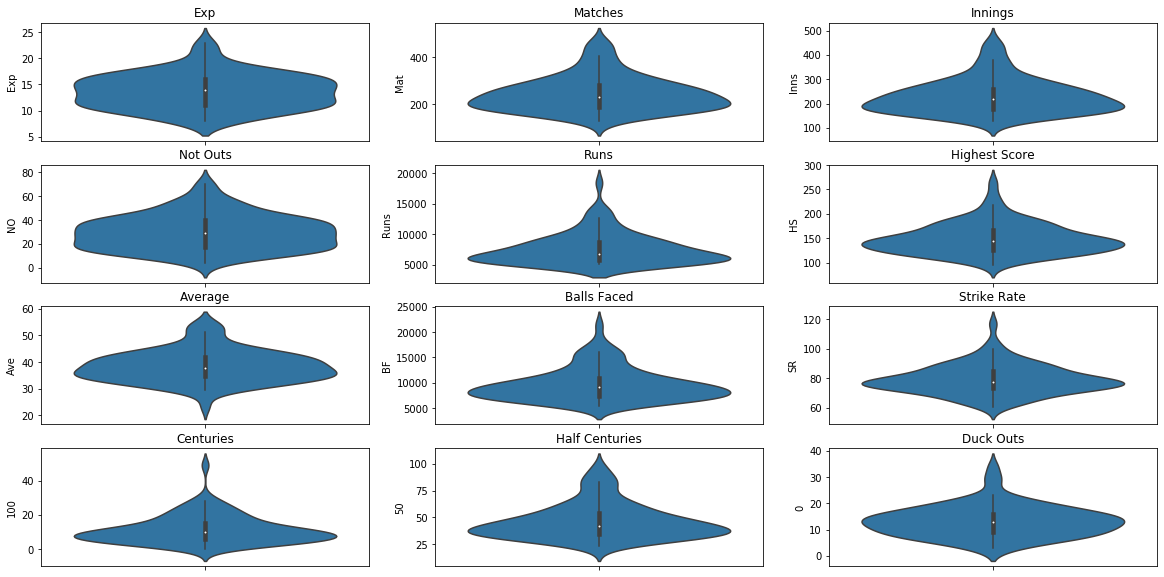

In [21]:
f, axes = plt.subplots(4,3, figsize = (20, 10))

s = sns.violinplot(y=df.Exp, ax=axes[0,0])
axes[0, 0].set_title('Exp')
s = sns.violinplot(y=df.Mat, ax=axes[0,1])
axes[0, 1].set_title('Matches')
s = sns.violinplot(y=df.Inns, ax=axes[0,2])
axes[0, 2].set_title('Innings')

s = sns.violinplot(y=df.NO, ax=axes[1,0])
axes[1, 0].set_title('Not Outs')
s = sns.violinplot(y=df.Runs, ax=axes[1,1])
axes[1, 1].set_title('Runs')
s = sns.violinplot(y=df.HS, ax=axes[1,2])
axes[1, 2].set_title('Highest Score')

s = sns.violinplot(y=df.Ave, ax=axes[2, 0])
axes[2, 0].set_title('Average')
s = sns.violinplot(y=df.BF, ax=axes[2, 1])
axes[2, 1].set_title('Balls Faced')
s = sns.violinplot(y=df.SR, ax=axes[2, 2])
axes[2, 2].set_title('Strike Rate')

s = sns.violinplot(y=df['100'], ax=axes[3, 0])
axes[3, 0].set_title('Centuries')
s = sns.violinplot(y=df['50'], ax=axes[3, 1])
axes[3, 1].set_title('Half Centuries')
s = sns.violinplot(y=df['0'], ax=axes[3, 2])
axes[3, 2].set_title('Duck Outs')

plt.show()

In [22]:
 for i in df.columns:
        if df[i].dtype != 'object':
            p1 = df[i].quantile(0.01)
            p2 = df[i].quantile(0.99)
            
            df[i][df[i] < p1] = p1
            df[i][df[i] > p2] = p2


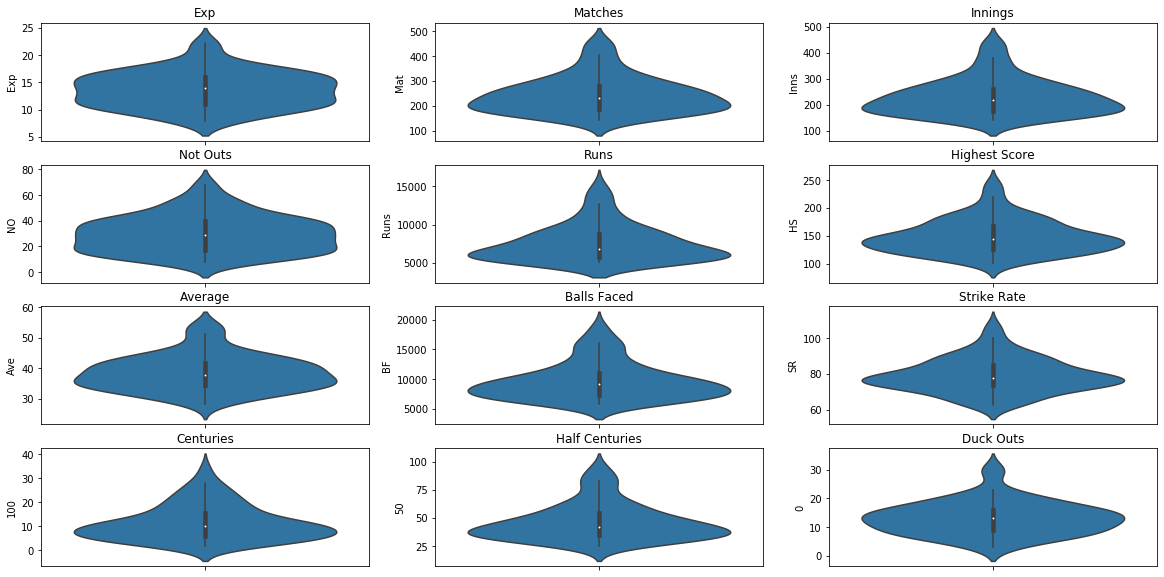

In [23]:
f, axes = plt.subplots(4,3, figsize = (20, 10))

s = sns.violinplot(y=df.Exp, ax=axes[0,0])
axes[0, 0].set_title('Exp')
s = sns.violinplot(y=df.Mat, ax=axes[0,1])
axes[0, 1].set_title('Matches')
s = sns.violinplot(y=df.Inns, ax=axes[0,2])
axes[0, 2].set_title('Innings')

s = sns.violinplot(y=df.NO, ax=axes[1,0])
axes[1, 0].set_title('Not Outs')
s = sns.violinplot(y=df.Runs, ax=axes[1,1])
axes[1, 1].set_title('Runs')
s = sns.violinplot(y=df.HS, ax=axes[1,2])
axes[1, 2].set_title('Highest Score')

s = sns.violinplot(y=df.Ave, ax=axes[2, 0])
axes[2, 0].set_title('Average')
s = sns.violinplot(y=df.BF, ax=axes[2, 1])
axes[2, 1].set_title('Balls Faced')
s = sns.violinplot(y=df.SR, ax=axes[2, 2])
axes[2, 2].set_title('Strike Rate')

s = sns.violinplot(y=df['100'], ax=axes[3, 0])
axes[3, 0].set_title('Centuries')
s = sns.violinplot(y=df['50'], ax=axes[3, 1])
axes[3, 1].set_title('Half Centuries')
s = sns.violinplot(y=df['0'], ax=axes[3, 2])
axes[3, 2].set_title('Duck Outs')

plt.show()

In [24]:
df_drop = df.copy()

In [25]:
df_drop

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),451.30,437.18,41.00,15156.24,200.00,44.8300,18778.18,86.2300,34.18,93.66,20.00,22.22
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.00,14234.00,169.00,41.9800,18048.00,78.8600,25.00,93.00,15.00,15.00
2,RT Ponting (AUS/ICC),375.00,365.00,39.00,13704.00,164.00,42.0300,17046.00,80.3900,30.00,82.00,20.00,17.00
3,ST Jayasuriya (Asia/SL),445.00,433.00,18.00,13430.00,189.00,32.3600,14725.00,91.2000,28.00,68.00,30.88,22.00
4,DPMD Jayawardene (Asia/SL),448.00,418.00,39.00,12650.00,144.00,33.3700,16020.00,78.9600,19.00,77.00,28.00,17.00
5,Inzamam-ul-Haq (Asia/PAK),378.00,350.00,53.00,11739.00,137.00,39.5200,15812.00,74.2400,10.00,83.00,20.00,16.00
6,JH Kallis (Afr/ICC/SA),328.00,314.00,53.00,11579.00,139.00,44.3600,15885.00,72.8900,17.00,86.00,17.00,18.00
7,SC Ganguly (Asia/INDIA),311.00,300.00,23.00,11363.00,183.00,41.0200,15416.00,73.7000,22.00,72.00,16.00,15.00
8,R Dravid (Asia/ICC/INDIA),344.00,318.00,40.00,10889.00,153.00,39.1600,15284.00,71.2400,12.00,83.00,13.00,15.00
9,BC Lara (ICC/WI),299.00,289.00,32.00,10405.00,169.00,40.4800,13086.00,79.5100,19.00,63.00,16.00,17.00


In [26]:
df_drop.drop(['Player'], axis = 1, inplace = True)

In [27]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
Mat     79 non-null float64
Inns    79 non-null float64
NO      79 non-null float64
Runs    79 non-null float64
HS      79 non-null float64
Ave     79 non-null float64
BF      79 non-null float64
SR      79 non-null float64
100     79 non-null float64
50      79 non-null float64
0       79 non-null float64
Exp     79 non-null float64
dtypes: float64(12)
memory usage: 7.5 KB


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
df_scaled = scaler.fit_transform(df_drop)

In [31]:
df_scaled

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [32]:
df_scaled = pd.DataFrame(df_scaled, columns = df_drop.columns)

In [33]:
df_scaled.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [34]:
from sklearn.cluster import KMeans

In [35]:
k_value = list(range(2,8))

In [36]:
k_value

[2, 3, 4, 5, 6, 7]

In [37]:
ssd = []       #SSD - Sumof Square Distance

for k in k_value:
    Kmodel = KMeans(n_clusters = k, max_iter = 150, random_state = 23)
    Kmodel.fit(df_scaled)
    ssd.append(Kmodel.inertia_)
    

In [38]:
ssd

[638.9991402610215,
 529.0019996771301,
 457.79613282224744,
 407.6427157325243,
 374.05855413996323,
 341.29723852697225]

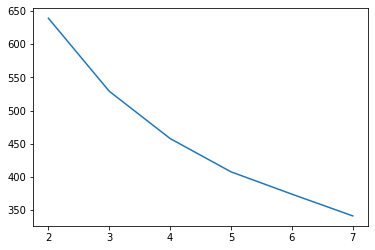

In [39]:
# to get Elbow we have to plot K_values againt ssd
plt.plot(k_value, ssd)

In [40]:
kmodel = KMeans(n_clusters=4, max_iter=150, random_state=23)
kmodel.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [41]:
arr = kmodel.labels_

In [42]:
df['ClusterID'] = arr

In [43]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),451.30,437.18,41.00,15156.24,200.00,44.8300,18778.18,86.2300,34.18,93.66,20.00,22.22,1
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.00,14234.00,169.00,41.9800,18048.00,78.8600,25.00,93.00,15.00,15.00,1
2,RT Ponting (AUS/ICC),375.00,365.00,39.00,13704.00,164.00,42.0300,17046.00,80.3900,30.00,82.00,20.00,17.00,1
3,ST Jayasuriya (Asia/SL),445.00,433.00,18.00,13430.00,189.00,32.3600,14725.00,91.2000,28.00,68.00,30.88,22.00,1
4,DPMD Jayawardene (Asia/SL),448.00,418.00,39.00,12650.00,144.00,33.3700,16020.00,78.9600,19.00,77.00,28.00,17.00,1
5,Inzamam-ul-Haq (Asia/PAK),378.00,350.00,53.00,11739.00,137.00,39.5200,15812.00,74.2400,10.00,83.00,20.00,16.00,1
6,JH Kallis (Afr/ICC/SA),328.00,314.00,53.00,11579.00,139.00,44.3600,15885.00,72.8900,17.00,86.00,17.00,18.00,1
7,SC Ganguly (Asia/INDIA),311.00,300.00,23.00,11363.00,183.00,41.0200,15416.00,73.7000,22.00,72.00,16.00,15.00,1
8,R Dravid (Asia/ICC/INDIA),344.00,318.00,40.00,10889.00,153.00,39.1600,15284.00,71.2400,12.00,83.00,13.00,15.00,1
9,BC Lara (ICC/WI),299.00,289.00,32.00,10405.00,169.00,40.4800,13086.00,79.5100,19.00,63.00,16.00,17.00,1


In [44]:
df[df['ClusterID'] == 0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
10,TM Dilshan (SL),330.0,303.0,41.0,10290.00,161.0,39.2700,11933.0,86.2300,22.0,47.00,11.0,17.0,0
11,Mohammad Yousuf (Asia/PAK),288.0,273.0,40.0,9720.00,141.0,41.7100,12942.0,75.1000,15.0,64.00,15.0,12.0,0
14,M Azharuddin (INDIA),334.0,308.0,54.0,9378.00,153.0,36.9200,12669.0,74.0200,7.0,58.00,9.0,15.0,0
16,PA de Silva (SL),308.0,296.0,30.0,9284.00,145.0,34.9000,11443.0,81.1300,11.0,64.00,17.0,19.0,0
19,S Chanderpaul (WI),268.0,251.0,40.0,8778.00,150.0,41.6000,12408.0,70.7400,11.0,59.00,6.0,17.0,0
20,Yuvraj Singh (Asia/INDIA),304.0,278.0,40.0,8701.00,150.0,36.5500,9924.0,87.6700,14.0,52.00,18.0,17.0,0
21,DL Haynes (WI),238.0,237.0,28.0,8648.00,152.0,41.3700,13707.0,63.0900,17.0,57.00,13.0,16.0,0
22,MS Atapattu (SL),268.0,259.0,32.0,8529.00,132.0,37.5700,12594.0,67.7200,11.0,59.00,13.0,17.0,0
27,Shahid Afridi (Asia/ICC/PAK),398.0,369.0,27.0,8064.00,124.0,28.1876,6892.0,107.1174,6.0,39.00,30.0,19.0,0
28,SP Fleming (ICC/NZ),280.0,269.0,21.0,8037.00,134.0,32.4000,11242.0,71.4900,8.0,49.00,17.0,13.0,0


In [45]:
df['ClusterID'].unique()

array([1, 0, 3, 2], dtype=int64)

In [46]:
# # Visualising the clusters
# plt.figure(figsize=(15,7))
# sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
# sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
# sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
# sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',  label= 'Cluster 4',s=50)
# #sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
# plt.xlabel("Not outs")
# plt.ylabel("Average")
# sns.scatterplot( x = cluster.cluster_centers_[0:4, 0], y =  cluster.cluster_centers_[0:4, 1], color = 'red',
#                 label = 'Centroids',s=300,marker=',')